Processing 00000.jpg ...
Original image shape: (700, 457, 3)


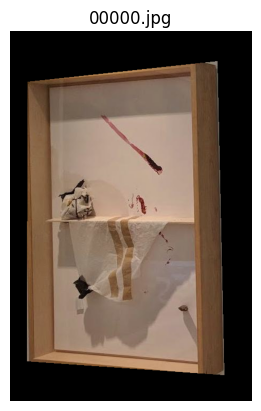

Processing 00001.jpg ...
Original image shape: (775, 876, 3)


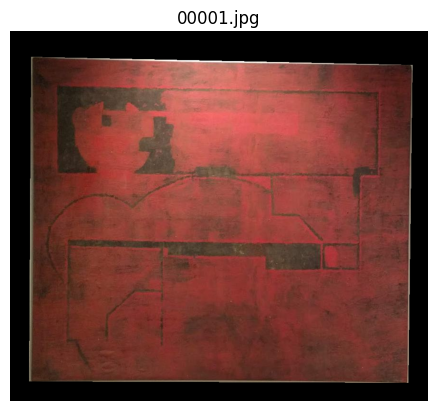

Processing 00002.jpg ...
Original image shape: (375, 926, 3)
Left image shape: (375, 366, 3)
Right image shape: (375, 560, 3)


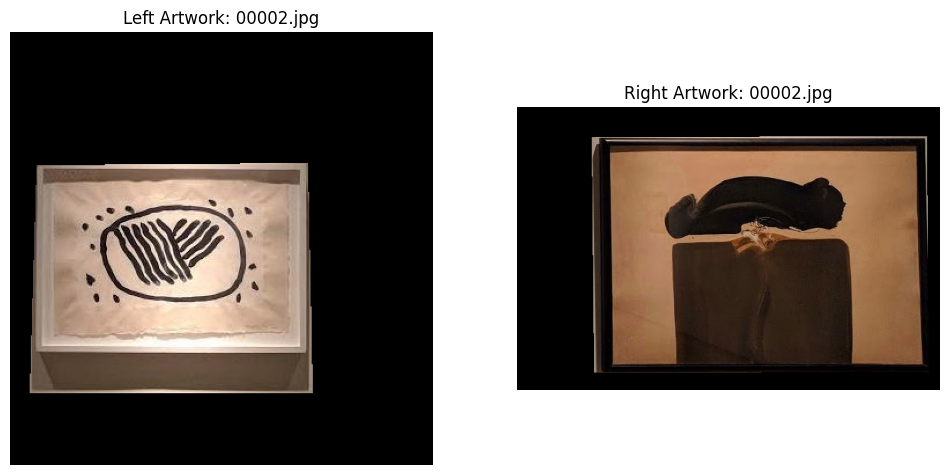

Processing 00003.jpg ...
Original image shape: (1868, 1778, 3)


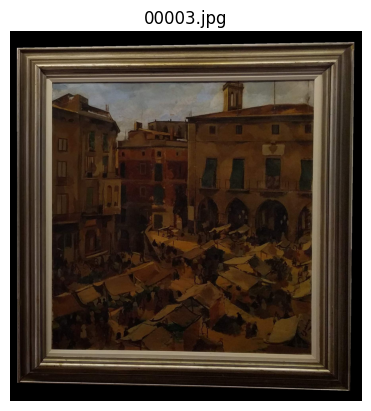

Processing 00004.jpg ...
Original image shape: (649, 725, 3)


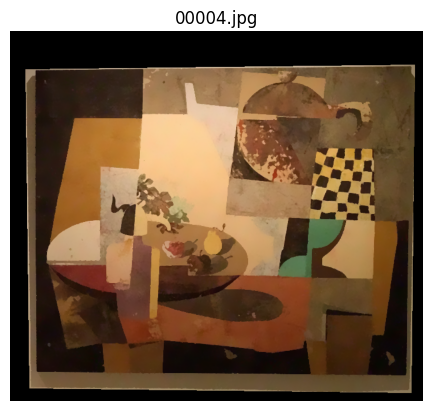

Processing 00005.jpg ...
Original image shape: (748, 2063, 3)
Left image shape: (748, 966, 3)
Right image shape: (748, 1097, 3)


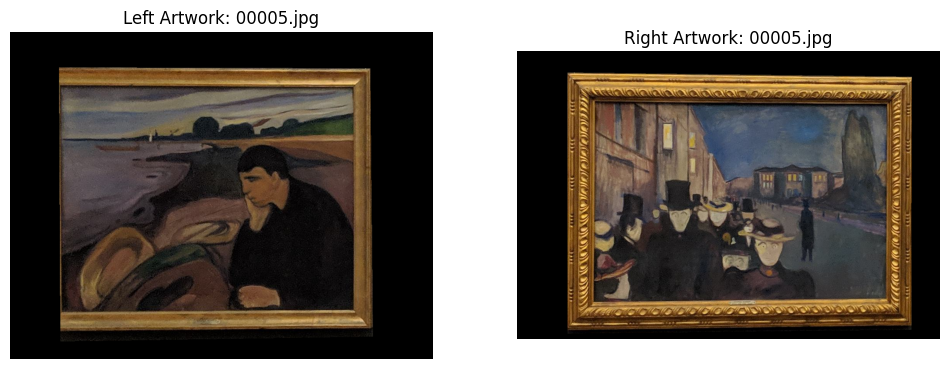

Processing 00006.jpg ...
Original image shape: (414, 761, 3)
Left image shape: (414, 355, 3)
Right image shape: (414, 406, 3)


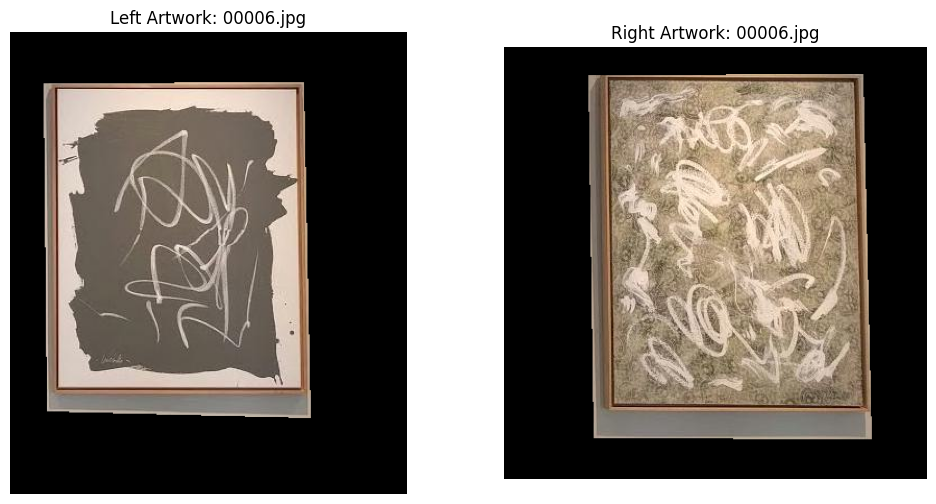

Processing 00007.jpg ...
Original image shape: (677, 1331, 3)
Left image shape: (677, 584, 3)
Right image shape: (677, 747, 3)


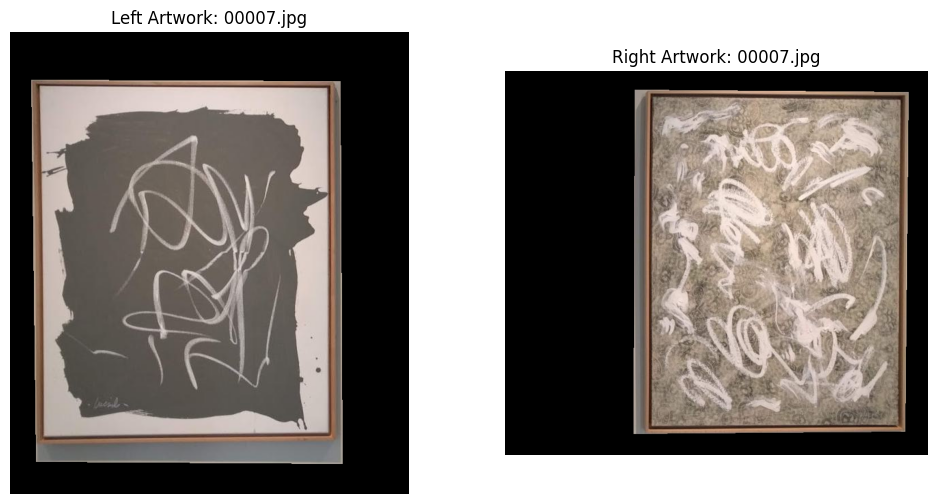

Processing 00008.jpg ...
Original image shape: (2167, 3960, 3)
Left image shape: (2167, 1868, 3)
Right image shape: (2167, 2092, 3)


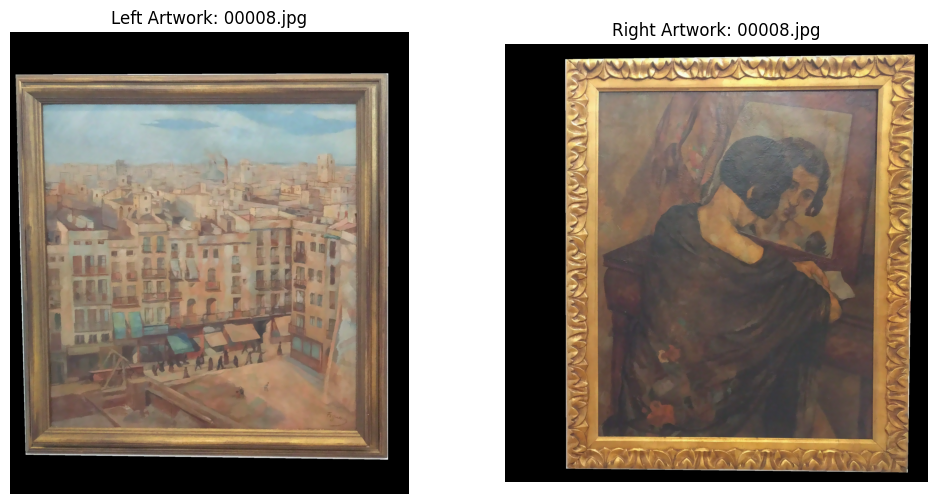

Processing 00009.jpg ...
Original image shape: (662, 643, 3)


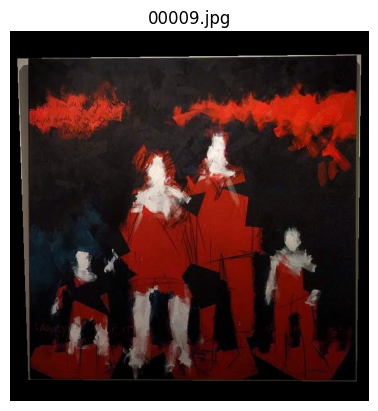

Processing 00010.jpg ...
Original image shape: (385, 529, 3)


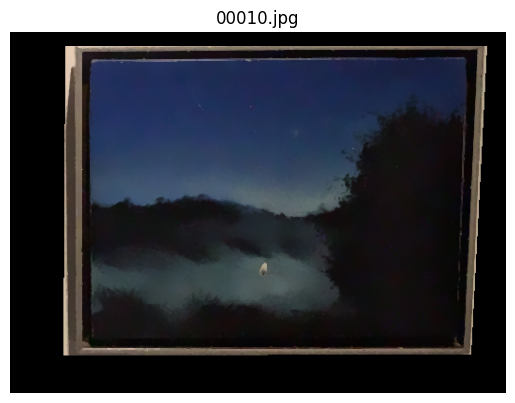

Processing 00011.jpg ...
Original image shape: (547, 1421, 3)
Left image shape: (547, 617, 3)
Right image shape: (547, 804, 3)


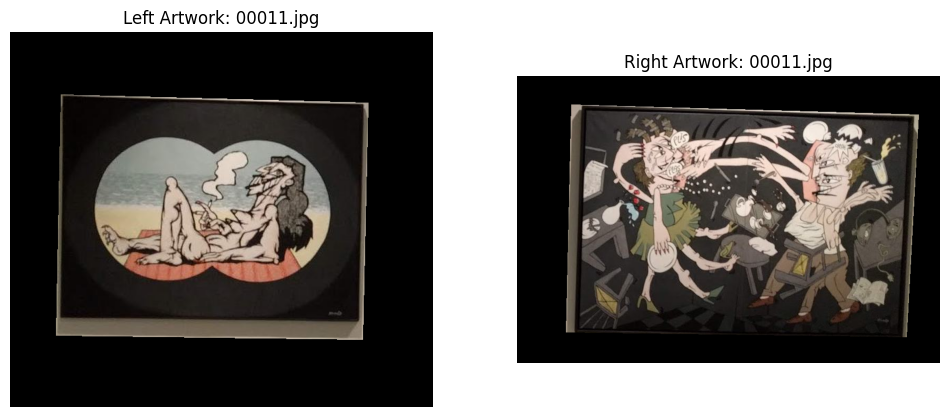

Processing 00012.jpg ...
Original image shape: (643, 1486, 3)


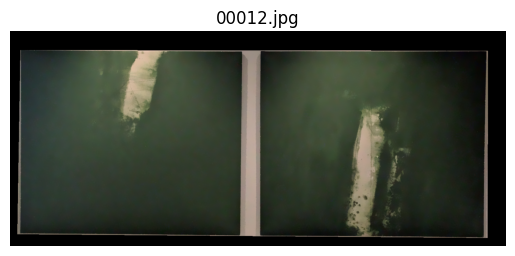

Processing 00013.jpg ...
Original image shape: (558, 542, 3)


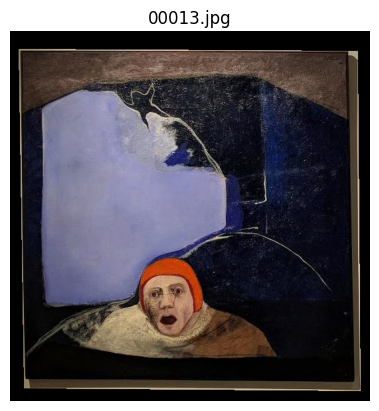

Processing 00014.jpg ...
Original image shape: (2093, 1492, 3)


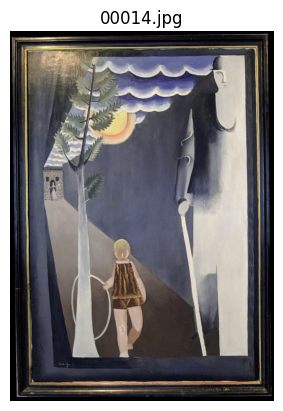

Processing 00015.jpg ...
Original image shape: (1530, 1806, 3)


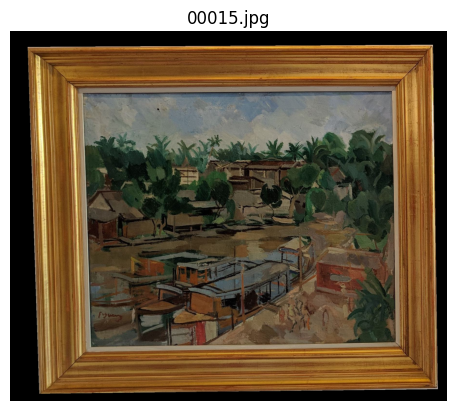

Processing 00016.jpg ...
Original image shape: (1998, 1629, 3)


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from background_removal_exp import background_remover_w2 as background_remover
from descriptors import preprocess_image
from image_split import split_images

# Path to your new dataset
IMG_FOLDER = "../Data/Week3/qsd2_w3/"

def process_images(img_folder):
    """Process all images in the folder."""
    image_names = sorted([f for f in os.listdir(img_folder) if f.endswith('.jpg')])

    for img_name in image_names:
        print(f"Processing {img_name} ...")
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path)

        print(f"Original image shape: {img.shape}")

        if img is None:
            print(f"⚠️ Skipping {img_name}: could not read image.")
            continue

        # --- Separación de imágenes ---
        valleys, splitted = split_images(img)

        # --- Evaluación y visualización ---
        if isinstance(splitted, tuple):
            left_artwork, right_artwork = splitted

            left_artwork = preprocess_image(left_artwork)
            right_artwork = preprocess_image(right_artwork)

            _, left_mask, left_output, _ = background_remover.remove_background_morphological_gradient(left_artwork)
            _, right_mask, right_output, _ = background_remover.remove_background_morphological_gradient(right_artwork)

            print(f"Left image shape: {left_output.shape}")
            print(f"Right image shape: {right_output.shape}")

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(left_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Left Artwork: {img_name}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(right_output, cv2.COLOR_BGR2RGB))
            plt.title(f"Right Artwork: {img_name}")
            plt.axis('off')

        else:
            img = preprocess_image(splitted)
            _, mask, output, _ = background_remover.remove_background_morphological_gradient(img)

            plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
            plt.title(f"{img_name}")
            plt.axis('off')

        plt.show()

# Run the function
process_images(IMG_FOLDER)
